<a href="https://colab.research.google.com/github/trongthuan205/DS102.K21/blob/master/11_NLP_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 . Import library

In [30]:
import pandas as pd
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1 . Load data

In [0]:
data = pd.read_csv('news.csv')

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# 2 . Preprocessing data

In [0]:
corpus_title = []
for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['title'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [0]:
def create_corpus(attr):
    corpus = []
    for i in range(len(data)):
        review = re.sub('[^a-zA-Z]', ' ', data[attr][i])
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [0]:
corpus_title = create_corpus('title')
corpus_text = create_corpus('text')

In [0]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus_title,corpus_text).toarray()
y = data.iloc[:, 1].values

In [39]:
len(corpus_text)

6335

In [24]:
X.shape[1]

1500

In [27]:
X[1]

array([0, 0, 0, ..., 0, 0, 0])

# 3 . Split data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# 4 . Train model

In [0]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [0]:
model = model.fit(X_train, y_train)

# 5 . Evaluate model

Train data

In [33]:
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                                                                                                                                                                                                                                                   precision    recall  f1-score   support

                                                                                                                                                                                                             "America has a simple ideology": how one of Russia's top US experts explains America       1.00      1.00      1.00         1
                                                                                                                                                                                                                            "Russia is concentrating" 2.0: Putin's new policy of "active defense"       1.00      1.00      1.00         1
      

Confusion matrix in train data: 
 [[3455   20]
 [   1 1106]]


Text(0.5, 1.0, 'Confusion matrix in Train data')

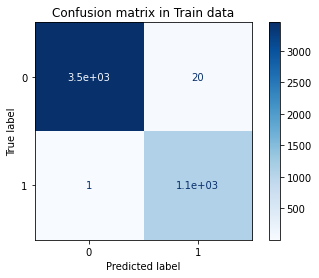

In [0]:
print('Confusion matrix in train data: \n', confusion_matrix(y_train, y_train_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = 'Blues')
plt.title('Confusion matrix in Train data')

Test data

In [0]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       885
           1       0.97      0.98      0.97       261

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146



Confusion matrix in Test data: 
 [[876   9]
 [  6 255]]


Text(0.5, 1.0, 'Confusion matrix in Test data')

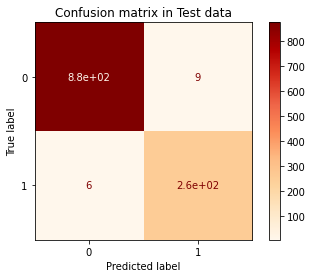

In [0]:
print('Confusion matrix in Test data: \n', confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(model, X_test, y_test, cmap = 'OrRd')
plt.title('Confusion matrix in Test data')